In [174]:
import pandas as pd
import matplotlib.pyplot
import seaborn as sns
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


Importing the neccesary libraries..

Reading the files and inspecting the data...

In [175]:
nga = pd.read_csv("nga_subnational_covid19_hera.csv", sep=";")

In [176]:
#checking the columns
nga.columns


Index(['ID', 'DATE', 'ISO_3', 'PAYS', 'ID_PAYS', 'REGION', 'ID_REGION',
       'CONTAMINES', 'DECES', 'GUERIS', 'CONTAMINES_FEMME', 'CONTAMINES_HOMME',
       'CONTAMINES_GENRE_NON_SPECIFIE', 'SOURCE'],
      dtype='object')

In [177]:
nga.shape

(26866, 14)

In [178]:
print(nga.head(10))

   ID        DATE ISO_3     PAYS  ID_PAYS       REGION  ID_REGION  CONTAMINES  \
0   1  27/02/2020   NGA  Nigéria       15         Abia        170         0.0   
1   2  27/02/2020   NGA  Nigéria       15      Adamawa        171         0.0   
2   3  27/02/2020   NGA  Nigéria       15    Akwa Ibom        172         0.0   
3   4  27/02/2020   NGA  Nigéria       15      Anambra        173         0.0   
4   5  27/02/2020   NGA  Nigéria       15       Bauchi        174         0.0   
5   6  27/02/2020   NGA  Nigéria       15      Bayelsa        175         0.0   
6   7  27/02/2020   NGA  Nigéria       15        Benue        176         0.0   
7   8  27/02/2020   NGA  Nigéria       15        Borno        177         0.0   
8   9  27/02/2020   NGA  Nigéria       15  Cross River        178         0.0   
9  10  27/02/2020   NGA  Nigéria       15        Delta        179         0.0   

   DECES  GUERIS  CONTAMINES_FEMME  CONTAMINES_HOMME  \
0    0.0     0.0               0.0               0.0

In [179]:
nga.tail()

,ID,DATE,ISO_3,PAYS,ID_PAYS,REGION,ID_REGION,CONTAMINES,DECES,GUERIS,CONTAMINES_FEMME,CONTAMINES_HOMME,CONTAMINES_GENRE_NON_SPECIFIE,SOURCE
26861,26862,02/02/2022,NGA,Nigéria,15,Sokoto,203,0.0,0.0,0.0,0.0,0.0,0.0,Nigeria Centre for Disease Control
26862,26863,02/02/2022,NGA,Nigéria,15,Taraba,204,0.0,0.0,0.0,0.0,0.0,0.0,Nigeria Centre for Disease Control
26863,26864,02/02/2022,NGA,Nigéria,15,Yobe,205,0.0,0.0,0.0,0.0,0.0,0.0,Nigeria Centre for Disease Control
26864,26865,02/02/2022,NGA,Nigéria,15,Zamfara,206,0.0,0.0,0.0,0.0,0.0,0.0,Nigeria Centre for Disease Control
26865,26866,02/02/2022,NGA,Nigéria,15,Non spécifié,207,0.0,0.0,0.0,0.0,0.0,0.0,Nigeria Centre for Disease Control


In [180]:
nga.describe()
#negative numbers present in contamines,gueris, homme, non_specifie columns
#

,ID,ID_PAYS,ID_REGION,CONTAMINES,DECES,GUERIS,CONTAMINES_FEMME,CONTAMINES_HOMME,CONTAMINES_GENRE_NON_SPECIFIE
count,26866.000000,26866.0,26866.00000,26802.000000,26463.000000,26280.000000,17734.000000,17734.000000,23663.000000
mean,13433.500000,15.0,188.50000,9.440452,0.118467,8.714574,2.197023,1.259276,8.102481
std,7755.690502,0.0,10.96606,45.747271,0.942725,107.723565,25.365332,15.169063,46.874095
min,1.000000,15.0,170.00000,-1.000000,0.000000,-46.000000,0.000000,-90.000000,-1.000000
25%,6717.250000,15.0,179.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,13433.500000,15.0,188.50000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,20149.750000,15.0,198.00000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,26866.000000,15.0,207.00000,3393.000000,79.000000,10946.000000,696.000000,493.000000,3393.000000


Checking for null values...

In [181]:
nga.isna().sum()

ID                                  0
DATE                                0
ISO_3                               0
PAYS                                0
ID_PAYS                             0
REGION                              0
ID_REGION                           0
CONTAMINES                         64
DECES                             403
GUERIS                            586
CONTAMINES_FEMME                 9132
CONTAMINES_HOMME                 9132
CONTAMINES_GENRE_NON_SPECIFIE    3203
SOURCE                              0
dtype: int64

Filling in the null values with the median values per column

In [182]:
nga['CONTAMINES']=nga.CONTAMINES.fillna(nga.CONTAMINES.median())
nga['DECES']=nga.DECES.fillna(nga.DECES.median())
nga['GUERIS']=nga.GUERIS.fillna(nga.GUERIS.median())
nga['CONTAMINES_FEMME']=nga.CONTAMINES_FEMME.fillna(nga.CONTAMINES_FEMME.median())
nga['CONTAMINES_HOMME']=nga.CONTAMINES_HOMME.fillna(nga.CONTAMINES_HOMME.median())
nga['CONTAMINES_GENRE_NON_SPECIFIE']=nga.CONTAMINES_GENRE_NON_SPECIFIE.fillna(nga.CONTAMINES_GENRE_NON_SPECIFIE.median())

In [183]:
#checking for null values
nga.isna().sum()

ID                               0
DATE                             0
ISO_3                            0
PAYS                             0
ID_PAYS                          0
REGION                           0
ID_REGION                        0
CONTAMINES                       0
DECES                            0
GUERIS                           0
CONTAMINES_FEMME                 0
CONTAMINES_HOMME                 0
CONTAMINES_GENRE_NON_SPECIFIE    0
SOURCE                           0
dtype: int64

In [184]:
nga.describe()

,ID,ID_PAYS,ID_REGION,CONTAMINES,DECES,GUERIS,CONTAMINES_FEMME,CONTAMINES_HOMME,CONTAMINES_GENRE_NON_SPECIFIE
count,26866.000000,26866.0,26866.00000,26866.000000,26866.000000,26866.000000,26866.000000,26866.000000,26866.000000
mean,13433.500000,15.0,188.50000,9.417963,0.116690,8.524492,1.450234,0.831237,7.136492
std,7755.690502,0.0,10.96606,45.695065,0.935739,106.549817,20.634374,12.338562,44.069426
min,1.000000,15.0,170.00000,-1.000000,0.000000,-46.000000,0.000000,-90.000000,-1.000000
25%,6717.250000,15.0,179.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,13433.500000,15.0,188.50000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,20149.750000,15.0,198.00000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,26866.000000,15.0,207.00000,3393.000000,79.000000,10946.000000,696.000000,493.000000,3393.000000


I observe from the code above that some columns contain negative values. These are probable input errors.
I replace them with the median values per column.

In [185]:
import numpy as np
nga.GUERIS = np.abs(nga.GUERIS)
nga.CONTAMINES = np.abs(nga.CONTAMINES)
nga.CONTAMINES_HOMME = np.abs(nga.CONTAMINES_HOMME)
nga.CONTAMINES = np.abs(nga.CONTAMINES)
nga.CONTAMINES_GENRE_NON_SPECIFIE = np.abs(nga.CONTAMINES_GENRE_NON_SPECIFIE)

In [186]:
nga.describe()

,ID,ID_PAYS,ID_REGION,CONTAMINES,DECES,GUERIS,CONTAMINES_FEMME,CONTAMINES_HOMME,CONTAMINES_GENRE_NON_SPECIFIE
count,26866.000000,26866.0,26866.00000,26866.000000,26866.000000,26866.000000,26866.000000,26866.000000,26866.000000
mean,13433.500000,15.0,188.50000,9.418038,0.116690,8.528735,1.450234,0.837936,7.136567
std,7755.690502,0.0,10.96606,45.695049,0.935739,106.549477,20.634374,12.338109,44.069414
min,1.000000,15.0,170.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6717.250000,15.0,179.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,13433.500000,15.0,188.50000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,20149.750000,15.0,198.00000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,26866.000000,15.0,207.00000,3393.000000,79.000000,10946.000000,696.000000,493.000000,3393.000000


In [187]:
nga.head()

,ID,DATE,ISO_3,PAYS,ID_PAYS,REGION,ID_REGION,CONTAMINES,DECES,GUERIS,CONTAMINES_FEMME,CONTAMINES_HOMME,CONTAMINES_GENRE_NON_SPECIFIE,SOURCE
0,1,27/02/2020,NGA,Nigéria,15,Abia,170,0.0,0.0,0.0,0.0,0.0,0.0,Nigeria Centre for Disease Control
1,2,27/02/2020,NGA,Nigéria,15,Adamawa,171,0.0,0.0,0.0,0.0,0.0,0.0,Nigeria Centre for Disease Control
2,3,27/02/2020,NGA,Nigéria,15,Akwa Ibom,172,0.0,0.0,0.0,0.0,0.0,0.0,Nigeria Centre for Disease Control
3,4,27/02/2020,NGA,Nigéria,15,Anambra,173,0.0,0.0,0.0,0.0,0.0,0.0,Nigeria Centre for Disease Control
4,5,27/02/2020,NGA,Nigéria,15,Bauchi,174,0.0,0.0,0.0,0.0,0.0,0.0,Nigeria Centre for Disease Control


Now the values are all integers

The columns are in French.
I rename each accordingly below

In [188]:
nga.rename(columns={
    'ID': 'id',
    'DATE': 'date',
    'ISO_3': 'iso_3',
    'PAYS': 'country',
    'ID_PAYS': 'country_id',
    'REGION': 'state',
    'ID_REGION': 'state_id',
    'CONTAMINES': 'confirmed',
    'DECES': 'deaths',
    'GUERIS': 'recovered',
    'CONTAMINES_FEMME': 'confirmed_female',
    'CONTAMINES_HOMME': 'confirmed_male',
    'CONTAMINES_GENRE_NON_SPECIFIE': 'confirmed_gender_ns',
    'SOURCE': 'source'
}, inplace=True)



In [189]:
nga.head()

,id,date,iso_3,country,country_id,state,state_id,confirmed,deaths,recovered,confirmed_female,confirmed_male,confirmed_gender_ns,source
0,1,27/02/2020,NGA,Nigéria,15,Abia,170,0.0,0.0,0.0,0.0,0.0,0.0,Nigeria Centre for Disease Control
1,2,27/02/2020,NGA,Nigéria,15,Adamawa,171,0.0,0.0,0.0,0.0,0.0,0.0,Nigeria Centre for Disease Control
2,3,27/02/2020,NGA,Nigéria,15,Akwa Ibom,172,0.0,0.0,0.0,0.0,0.0,0.0,Nigeria Centre for Disease Control
3,4,27/02/2020,NGA,Nigéria,15,Anambra,173,0.0,0.0,0.0,0.0,0.0,0.0,Nigeria Centre for Disease Control
4,5,27/02/2020,NGA,Nigéria,15,Bauchi,174,0.0,0.0,0.0,0.0,0.0,0.0,Nigeria Centre for Disease Control


'Nigeria' is misspelt.
Correcting the error.

In [190]:
nga.country=nga.country.replace(['Nigéria'],'Nigeria')
nga.head()

,id,date,iso_3,country,country_id,state,state_id,confirmed,deaths,recovered,confirmed_female,confirmed_male,confirmed_gender_ns,source
0,1,27/02/2020,NGA,Nigeria,15,Abia,170,0.0,0.0,0.0,0.0,0.0,0.0,Nigeria Centre for Disease Control
1,2,27/02/2020,NGA,Nigeria,15,Adamawa,171,0.0,0.0,0.0,0.0,0.0,0.0,Nigeria Centre for Disease Control
2,3,27/02/2020,NGA,Nigeria,15,Akwa Ibom,172,0.0,0.0,0.0,0.0,0.0,0.0,Nigeria Centre for Disease Control
3,4,27/02/2020,NGA,Nigeria,15,Anambra,173,0.0,0.0,0.0,0.0,0.0,0.0,Nigeria Centre for Disease Control
4,5,27/02/2020,NGA,Nigeria,15,Bauchi,174,0.0,0.0,0.0,0.0,0.0,0.0,Nigeria Centre for Disease Control


In [191]:
# Check that there is only one instance of each country
nga['country'].value_counts()

Nigeria    26866
Name: country, dtype: int64

In [192]:
#checking that there are 36 states
states = nga['state']
print(states)

0                Abia
1             Adamawa
2           Akwa Ibom
3             Anambra
4              Bauchi
             ...     
26861          Sokoto
26862          Taraba
26863            Yobe
26864         Zamfara
26865    Non spécifié
Name: state, Length: 26866, dtype: object


In [193]:

print(states)

0                Abia
1             Adamawa
2           Akwa Ibom
3             Anambra
4              Bauchi
             ...     
26861          Sokoto
26862          Taraba
26863            Yobe
26864         Zamfara
26865    Non spécifié
Name: state, Length: 26866, dtype: object


In [194]:
#checking for this unwanted value
nga.state[26865]

'Non spécifié'

In [195]:
#converting date datattype to datetime
nga.date = pd.to_datetime(nga.date)

In [196]:
#checking if conversion is successfull
nga.dtypes

id                              int64
date                   datetime64[ns]
iso_3                          object
country                        object
country_id                      int64
state                          object
state_id                        int64
confirmed                     float64
deaths                        float64
recovered                     float64
confirmed_female              float64
confirmed_male                float64
confirmed_gender_ns           float64
source                         object
dtype: object

In [197]:
#dropping unwanted columns
nga.drop(['iso_3', 'country_id', 'state_id', 'id'], axis=1, inplace=True)

In [198]:
#removing an error value (row)
nga.drop([26865], inplace=True)

In [199]:
#removing an unwanted column
nga.drop(['source'], axis=1, inplace=True)

In [200]:
print(nga.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26865 entries, 0 to 26864
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   date                 26865 non-null  datetime64[ns]
 1   country              26865 non-null  object        
 2   state                26865 non-null  object        
 3   confirmed            26865 non-null  float64       
 4   deaths               26865 non-null  float64       
 5   recovered            26865 non-null  float64       
 6   confirmed_female     26865 non-null  float64       
 7   confirmed_male       26865 non-null  float64       
 8   confirmed_gender_ns  26865 non-null  float64       
dtypes: datetime64[ns](1), float64(6), object(2)
memory usage: 1.8+ MB
None


In [201]:
#number of confirmed cases
print(nga.confirmed.sum())
print(nga.deaths.sum())
print(nga.recovered.sum())

253025.0
3135.0
229133.0


In [202]:
#checking most states with confirmed cases
nga.sort_values(by=['confirmed'], ascending=False)

,date,country,state,confirmed,deaths,recovered,confirmed_female,confirmed_male,confirmed_gender_ns
25256,2021-12-22,Nigeria,Lagos,3393.0,0.0,0.0,0.0,0.0,3393.0
25218,2021-12-21,Nigeria,Lagos,1552.0,0.0,0.0,0.0,0.0,1552.0
12868,2021-01-30,Nigeria,Lagos,1040.0,0.0,461.0,0.0,0.0,1040.0
25066,2021-12-17,Nigeria,Lagos,906.0,0.0,0.0,0.0,0.0,906.0
12374,2021-01-17,Nigeria,Lagos,901.0,2.0,717.0,0.0,0.0,901.0
...,...,...,...,...,...,...,...,...,...
10456,2020-11-28,Nigeria,Benue,0.0,0.0,0.0,0.0,0.0,0.0
10455,2020-11-28,Nigeria,Bayelsa,0.0,0.0,0.0,0.0,0.0,0.0
10454,2020-11-28,Nigeria,Bauchi,0.0,0.0,0.0,0.0,0.0,0.0
10453,2020-11-28,Nigeria,Anambra,0.0,0.0,0.0,0.0,0.0,0.0


In [203]:
#exporting the data
out_nga = 'nga_covid19.csv'
nga.to_csv(out_nga)


In [204]:
nga.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26865 entries, 0 to 26864
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   date                 26865 non-null  datetime64[ns]
 1   country              26865 non-null  object        
 2   state                26865 non-null  object        
 3   confirmed            26865 non-null  float64       
 4   deaths               26865 non-null  float64       
 5   recovered            26865 non-null  float64       
 6   confirmed_female     26865 non-null  float64       
 7   confirmed_male       26865 non-null  float64       
 8   confirmed_gender_ns  26865 non-null  float64       
dtypes: datetime64[ns](1), float64(6), object(2)
memory usage: 1.8+ MB


In [205]:
#reading population table. The goal is to merge with nga
import pandas as pd
pop_nga = pd.read_csv(r"C:\Users\eduna\Documents\state_pop.txt", sep='\s+')
pop_nga.head()

,state,population_(2022)
0,Lagos,"21,000,000"
1,Kano,"12,550,598"
2,Kaduna,"8,252,366"
3,Oyo,"7,840,864"
4,Katsina,"7,831,319"


In [206]:
#correcting some states misspellings
pop_nga.state=pop_nga.state.replace(['Akwa-Ibom'],'Akwa Ibom')
pop_nga.state=pop_nga.state.replace(['Cross-River'],'Cross River')

In [207]:
#checking the correction
pop_nga.state[13]

'Akwa Ibom'

In [208]:
#checking that data is clean
pop_nga.isna().sum()
pop_nga.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   state              37 non-null     object
 1   population_(2022)  37 non-null     object
dtypes: object(2)
memory usage: 720.0+ bytes


In [209]:
#exporting the data
pop_nga.to_csv('pop_nga.csv')

In [210]:
nga.head()

,date,country,state,confirmed,deaths,recovered,confirmed_female,confirmed_male,confirmed_gender_ns
0,2020-02-27,Nigeria,Abia,0.0,0.0,0.0,0.0,0.0,0.0
1,2020-02-27,Nigeria,Adamawa,0.0,0.0,0.0,0.0,0.0,0.0
2,2020-02-27,Nigeria,Akwa Ibom,0.0,0.0,0.0,0.0,0.0,0.0
3,2020-02-27,Nigeria,Anambra,0.0,0.0,0.0,0.0,0.0,0.0
4,2020-02-27,Nigeria,Bauchi,0.0,0.0,0.0,0.0,0.0,0.0


In [211]:
#dropping rows with 'Non specifie'
nga.drop(nga.index[nga['state'] == 'Non spécifié'], inplace=True)
nga['state']

0             Abia
1          Adamawa
2        Akwa Ibom
3          Anambra
4           Bauchi
           ...    
26860       Rivers
26861       Sokoto
26862       Taraba
26863         Yobe
26864      Zamfara
Name: state, Length: 26159, dtype: object

In [212]:
#merging the data with population data
nga_merged = pd.merge(nga, pop_nga, on='state', how='left')
nga_merged.head(45)


,date,country,state,confirmed,deaths,recovered,confirmed_female,confirmed_male,confirmed_gender_ns,population_(2022)
0,2020-02-27,Nigeria,Abia,0.0,0.0,0.0,0.0,0.0,0.0,"3,727,347"
1,2020-02-27,Nigeria,Adamawa,0.0,0.0,0.0,0.0,0.0,0.0,"4,248,436"
2,2020-02-27,Nigeria,Akwa Ibom,0.0,0.0,0.0,0.0,0.0,0.0,"5,482,177"
3,2020-02-27,Nigeria,Anambra,0.0,0.0,0.0,0.0,0.0,0.0,"5,527,809"
4,2020-02-27,Nigeria,Bauchi,0.0,0.0,0.0,0.0,0.0,0.0,"6,537,314"
5,2020-02-27,Nigeria,Bayelsa,0.0,0.0,0.0,0.0,0.0,0.0,"2,277,961"
6,2020-02-27,Nigeria,Benue,0.0,0.0,0.0,0.0,0.0,0.0,"5,741,815"
7,2020-02-27,Nigeria,Borno,0.0,0.0,0.0,0.0,0.0,0.0,"5,860,183"
8,2020-02-27,Nigeria,Cross River,0.0,0.0,0.0,0.0,0.0,0.0,"3,866,269"
9,2020-02-27,Nigeria,Delta,0.0,0.0,0.0,0.0,0.0,0.0,"5,663,362"


In [213]:
#exporting the data
nga_merged.to_csv('nga_merged.csv')

PermissionError: [Errno 13] Permission denied: 'nga_merged.csv'

In [ ]:
#checking the newly merged column
nga_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26159 entries, 0 to 26158
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   date                 26159 non-null  datetime64[ns]
 1   country              26159 non-null  object        
 2   state                26159 non-null  object        
 3   confirmed            26159 non-null  float64       
 4   deaths               26159 non-null  float64       
 5   recovered            26159 non-null  float64       
 6   confirmed_female     26159 non-null  float64       
 7   confirmed_male       26159 non-null  float64       
 8   confirmed_gender_ns  26159 non-null  float64       
 9   population_(2022)    25452 non-null  object        
dtypes: datetime64[ns](1), float64(6), object(3)
memory usage: 2.2+ MB


In [ ]:
#checking for the columns with null values
nga_merged.isnull().sum()

date                     0
country                  0
state                    0
confirmed                0
deaths                   0
recovered                0
confirmed_female         0
confirmed_male           0
confirmed_gender_ns      0
population_(2022)      707
dtype: int64

The population column has some missing values. Let's check that out...

In [ ]:
nga_merged[nga_merged['population_(2022)'].isnull()]

,date,country,state,confirmed,deaths,recovered,confirmed_female,confirmed_male,confirmed_gender_ns,population_(2022)
14,2020-02-27,Nigeria,Federal Capital Territory,0.0,0.0,0.0,0.0,0.0,0.0,NaN
51,2020-02-28,Nigeria,Federal Capital Territory,0.0,0.0,0.0,0.0,0.0,0.0,NaN
88,2020-02-29,Nigeria,Federal Capital Territory,0.0,0.0,0.0,0.0,0.0,0.0,NaN
125,2020-01-03,Nigeria,Federal Capital Territory,0.0,0.0,0.0,0.0,0.0,0.0,NaN
162,2020-02-03,Nigeria,Federal Capital Territory,0.0,0.0,0.0,0.0,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...
25988,2022-01-29,Nigeria,Federal Capital Territory,3.0,0.0,0.0,0.0,0.0,3.0,NaN
26025,2022-01-30,Nigeria,Federal Capital Territory,6.0,0.0,245.0,0.0,0.0,6.0,NaN
26062,2022-01-31,Nigeria,Federal Capital Territory,0.0,0.0,0.0,0.0,0.0,0.0,NaN
26099,2022-01-02,Nigeria,Federal Capital Territory,0.0,0.0,0.0,0.0,0.0,0.0,NaN


The problem seems to be that values for the Federal Capital Territory were not inputed during the merging

In [ ]:
#fixing the nans in the population column by inserting with the value of the population of the FCT
nga_merged['population_(2022)'] = nga_merged['population_(2022)'].fillna(3564126)
#confirming that no nulls are present
nga_merged[nga_merged['population_(2022)'].isnull()]

,date,country,state,confirmed,deaths,recovered,confirmed_female,confirmed_male,confirmed_gender_ns,population_(2022)


In [ ]:
nga_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26159 entries, 0 to 26158
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   date                 26159 non-null  datetime64[ns]
 1   country              26159 non-null  object        
 2   state                26159 non-null  object        
 3   confirmed            26159 non-null  float64       
 4   deaths               26159 non-null  float64       
 5   recovered            26159 non-null  float64       
 6   confirmed_female     26159 non-null  float64       
 7   confirmed_male       26159 non-null  float64       
 8   confirmed_gender_ns  26159 non-null  float64       
 9   population_(2022)    26159 non-null  object        
dtypes: datetime64[ns](1), float64(6), object(3)
memory usage: 2.2+ MB


Creating separate columns for year, month and date in preparation for aggregation

In [ ]:
#Extracting the year from the date column
nga_merged['year'] = pd.DatetimeIndex(nga_merged['date']).year
#confirming
nga_merged.head()

,date,country,state,confirmed,deaths,recovered,confirmed_female,confirmed_male,confirmed_gender_ns,population_(2022),year
0,2020-02-27,Nigeria,Abia,0.0,0.0,0.0,0.0,0.0,0.0,"3,727,347",2020
1,2020-02-27,Nigeria,Adamawa,0.0,0.0,0.0,0.0,0.0,0.0,"4,248,436",2020
2,2020-02-27,Nigeria,Akwa Ibom,0.0,0.0,0.0,0.0,0.0,0.0,"5,482,177",2020
3,2020-02-27,Nigeria,Anambra,0.0,0.0,0.0,0.0,0.0,0.0,"5,527,809",2020
4,2020-02-27,Nigeria,Bauchi,0.0,0.0,0.0,0.0,0.0,0.0,"6,537,314",2020


In [ ]:
#Extracting month
nga_merged['month'] = pd.DatetimeIndex(nga_merged['date']).month
#confirming
nga_merged.head()

,date,country,state,confirmed,deaths,recovered,confirmed_female,confirmed_male,confirmed_gender_ns,population_(2022),year,month
0,2020-02-27,Nigeria,Abia,0.0,0.0,0.0,0.0,0.0,0.0,"3,727,347",2020,2
1,2020-02-27,Nigeria,Adamawa,0.0,0.0,0.0,0.0,0.0,0.0,"4,248,436",2020,2
2,2020-02-27,Nigeria,Akwa Ibom,0.0,0.0,0.0,0.0,0.0,0.0,"5,482,177",2020,2
3,2020-02-27,Nigeria,Anambra,0.0,0.0,0.0,0.0,0.0,0.0,"5,527,809",2020,2
4,2020-02-27,Nigeria,Bauchi,0.0,0.0,0.0,0.0,0.0,0.0,"6,537,314",2020,2


In [ ]:
nga_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26159 entries, 0 to 26158
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   date                 26159 non-null  datetime64[ns]
 1   country              26159 non-null  object        
 2   state                26159 non-null  object        
 3   confirmed            26159 non-null  float64       
 4   deaths               26159 non-null  float64       
 5   recovered            26159 non-null  float64       
 6   confirmed_female     26159 non-null  float64       
 7   confirmed_male       26159 non-null  float64       
 8   confirmed_gender_ns  26159 non-null  float64       
 9   population_(2022)    26159 non-null  object        
 10  year                 26159 non-null  int64         
 11  month                26159 non-null  int64         
dtypes: datetime64[ns](1), float64(6), int64(2), object(3)
memory usage: 2.6+ MB


In [ ]:
nga_merged.to_csv("nga_merged_month_year.csv")

In [ ]:
nga_merged['active_cases'] = nga_merged['confirmed']-(nga_merged['recovered']+nga_merged['deaths'])
nga_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26159 entries, 0 to 26158
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   date                 26159 non-null  datetime64[ns]
 1   country              26159 non-null  object        
 2   state                26159 non-null  object        
 3   confirmed            26159 non-null  float64       
 4   deaths               26159 non-null  float64       
 5   recovered            26159 non-null  float64       
 6   confirmed_female     26159 non-null  float64       
 7   confirmed_male       26159 non-null  float64       
 8   confirmed_gender_ns  26159 non-null  float64       
 9   population_(2022)    26159 non-null  object        
 10  year                 26159 non-null  int64         
 11  month                26159 non-null  int64         
 12  active_cases         26159 non-null  float64       
dtypes: datetime64[ns](1), float64(7

In [ ]:
nga_merged[nga_merged['active_cases'].values < 0]

,date,country,state,confirmed,deaths,recovered,confirmed_female,confirmed_male,confirmed_gender_ns,population_(2022),year,month,active_cases
767,2020-03-18,Nigeria,Ogun,0.0,0.0,1.0,0.0,0.0,0.0,"5,217,716",2020,3,-1.0
878,2020-03-21,Nigeria,Ogun,0.0,0.0,1.0,0.0,0.0,0.0,"5,217,716",2020,3,-1.0
1233,2020-03-31,Nigeria,Ekiti,0.0,0.0,1.0,0.0,0.0,0.0,"3,270,798",2020,3,-1.0
1356,2020-03-04,Nigeria,Lagos,7.0,0.0,11.0,0.0,0.0,0.0,"21,000,000",2020,3,-4.0
1467,2020-06-04,Nigeria,Lagos,0.0,0.0,1.0,0.0,0.0,0.0,"21,000,000",2020,6,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
26029,2022-01-30,Nigeria,Kaduna,0.0,0.0,7.0,0.0,0.0,0.0,"8,252,366",2022,1,-7.0
26030,2022-01-30,Nigeria,Kano,1.0,0.0,6.0,0.0,0.0,1.0,"12,550,598",2022,1,-5.0
26038,2022-01-30,Nigeria,Ogun,0.0,0.0,3.0,0.0,0.0,0.0,"5,217,716",2022,1,-3.0
26039,2022-01-30,Nigeria,Osun,9.0,0.0,15.0,0.0,0.0,9.0,"4,705,589",2022,1,-6.0


The issue seems to be from the formula. And the negative values occur at dates when 'recovered' is greater than 'confirmed'. At such cases, active cases should be zero

In [ ]:
#using clip function to correct this
nga_merged['active_cases'] = nga_merged['active_cases'].clip(lower=0)
nga_merged.describe()

,confirmed,deaths,recovered,confirmed_female,confirmed_male,confirmed_gender_ns,year,month,active_cases
count,26159.000000,26159.000000,26159.000000,26159.0,26159.0,26159.000000,26159.000000,26159.000000,26159.000000
mean,9.672579,0.119844,8.759242,0.0,0.0,7.329447,2020.609618,6.595474,6.319584
std,46.281864,0.948101,107.970440,0.0,0.0,44.645168,0.575629,3.429761,38.039798
min,0.000000,0.000000,0.000000,0.0,0.0,0.000000,2020.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.0,0.0,0.000000,2020.000000,4.000000,0.000000
50%,0.000000,0.000000,0.000000,0.0,0.0,0.000000,2021.000000,7.000000,0.000000
75%,3.000000,0.000000,0.000000,0.0,0.0,0.000000,2021.000000,10.000000,0.000000
max,3393.000000,79.000000,10946.000000,0.0,0.0,3393.000000,2022.000000,12.000000,3393.000000


In [ ]:
#total deaths
nga_merged['deaths'].sum()

3135.0

In [ ]:
#total cases
nga_merged['confirmed'].sum()

253025.0

In [ ]:
#total recovered
nga_merged['recovered'].sum()

229133.0

Visualizing the data

<AxesSubplot:xlabel='date', ylabel='confirmed'>

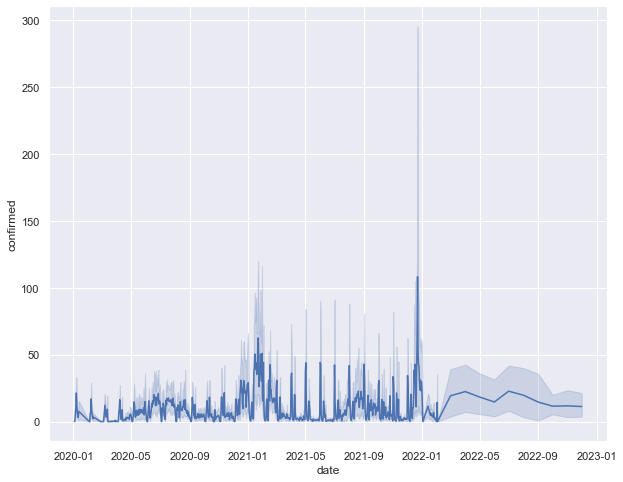

In [ ]:
sns.set(rc={'figure.figsize':(10,8)})
sns.lineplot(x='date', y='confirmed', data=nga_merged)
#number of confirmed cases peaked early 2022

<AxesSubplot:xlabel='date', ylabel='deaths'>

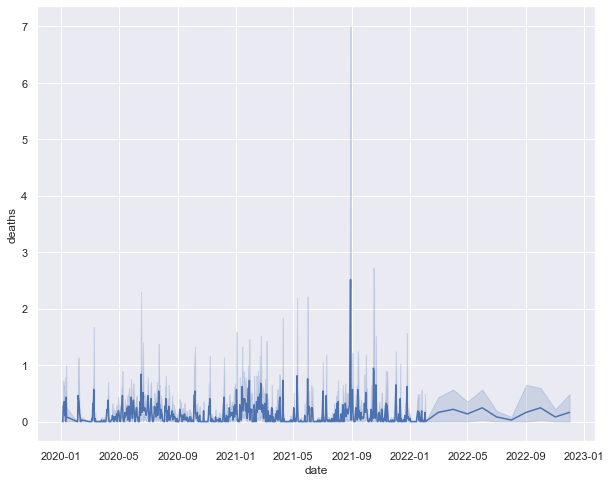

In [ ]:
sns.set(rc={'figure.figsize':(10,8)})
sns.lineplot(x='date', y='deaths', data=nga_merged)
#number of deaths peaked mid 2021

<AxesSubplot:xlabel='state', ylabel='confirmed'>

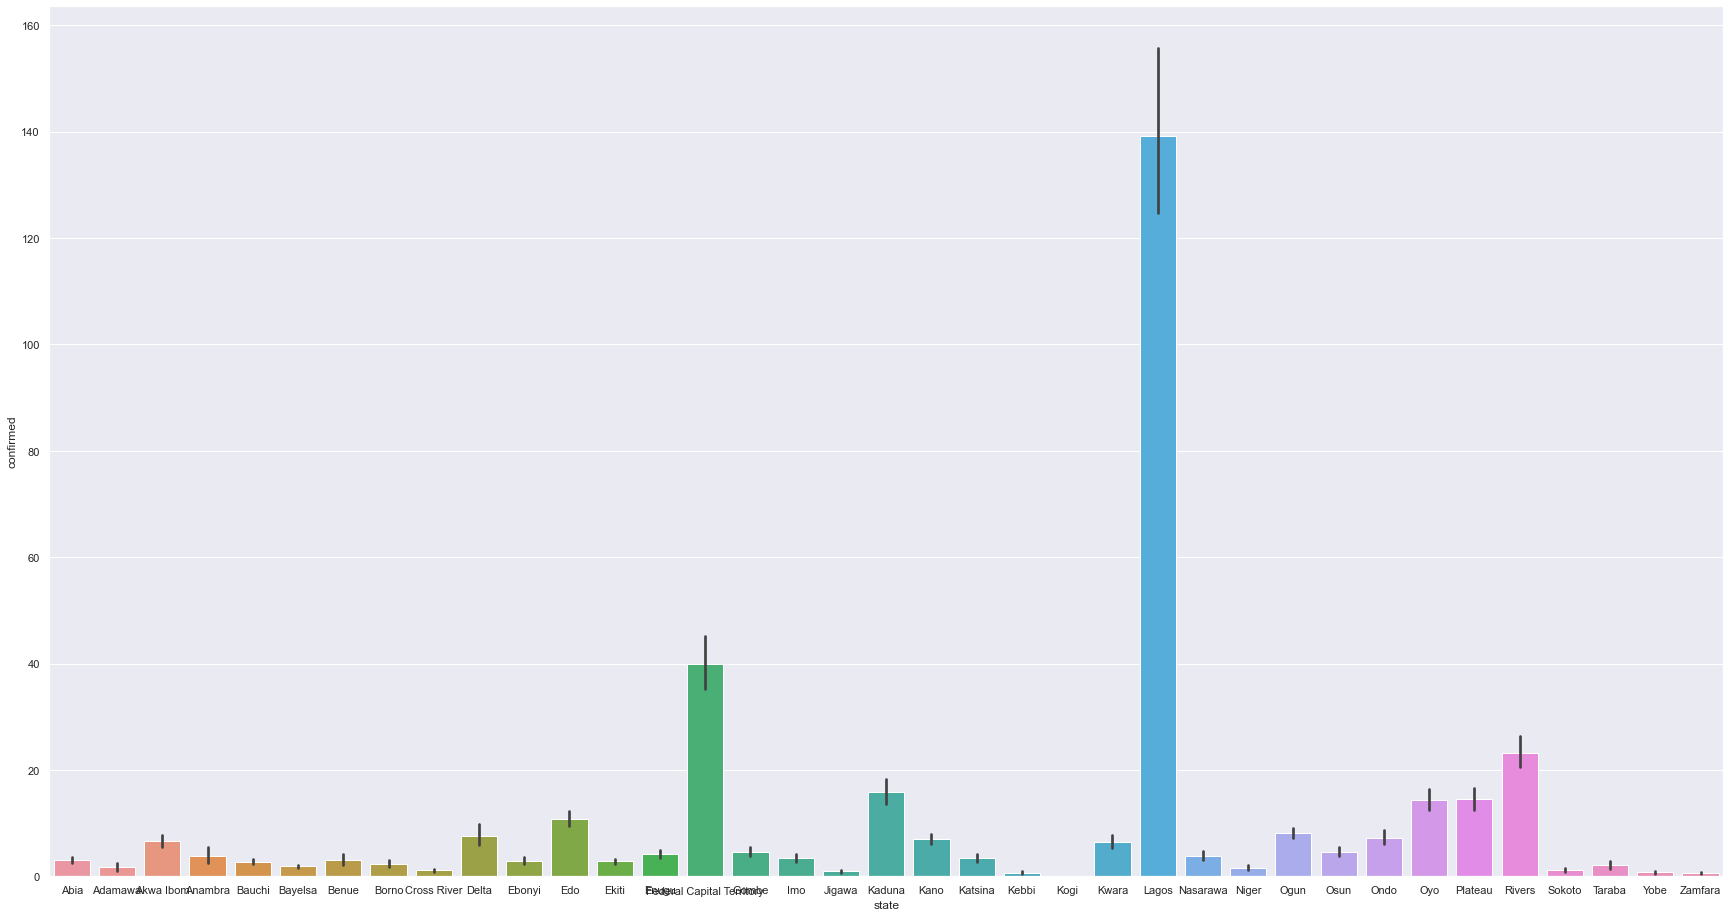

In [ ]:
sns.set(rc={'figure.figsize':(30,16)})
sns.barplot(x='state', y='confirmed', data=nga_merged)

<AxesSubplot:xlabel='state', ylabel='deaths'>

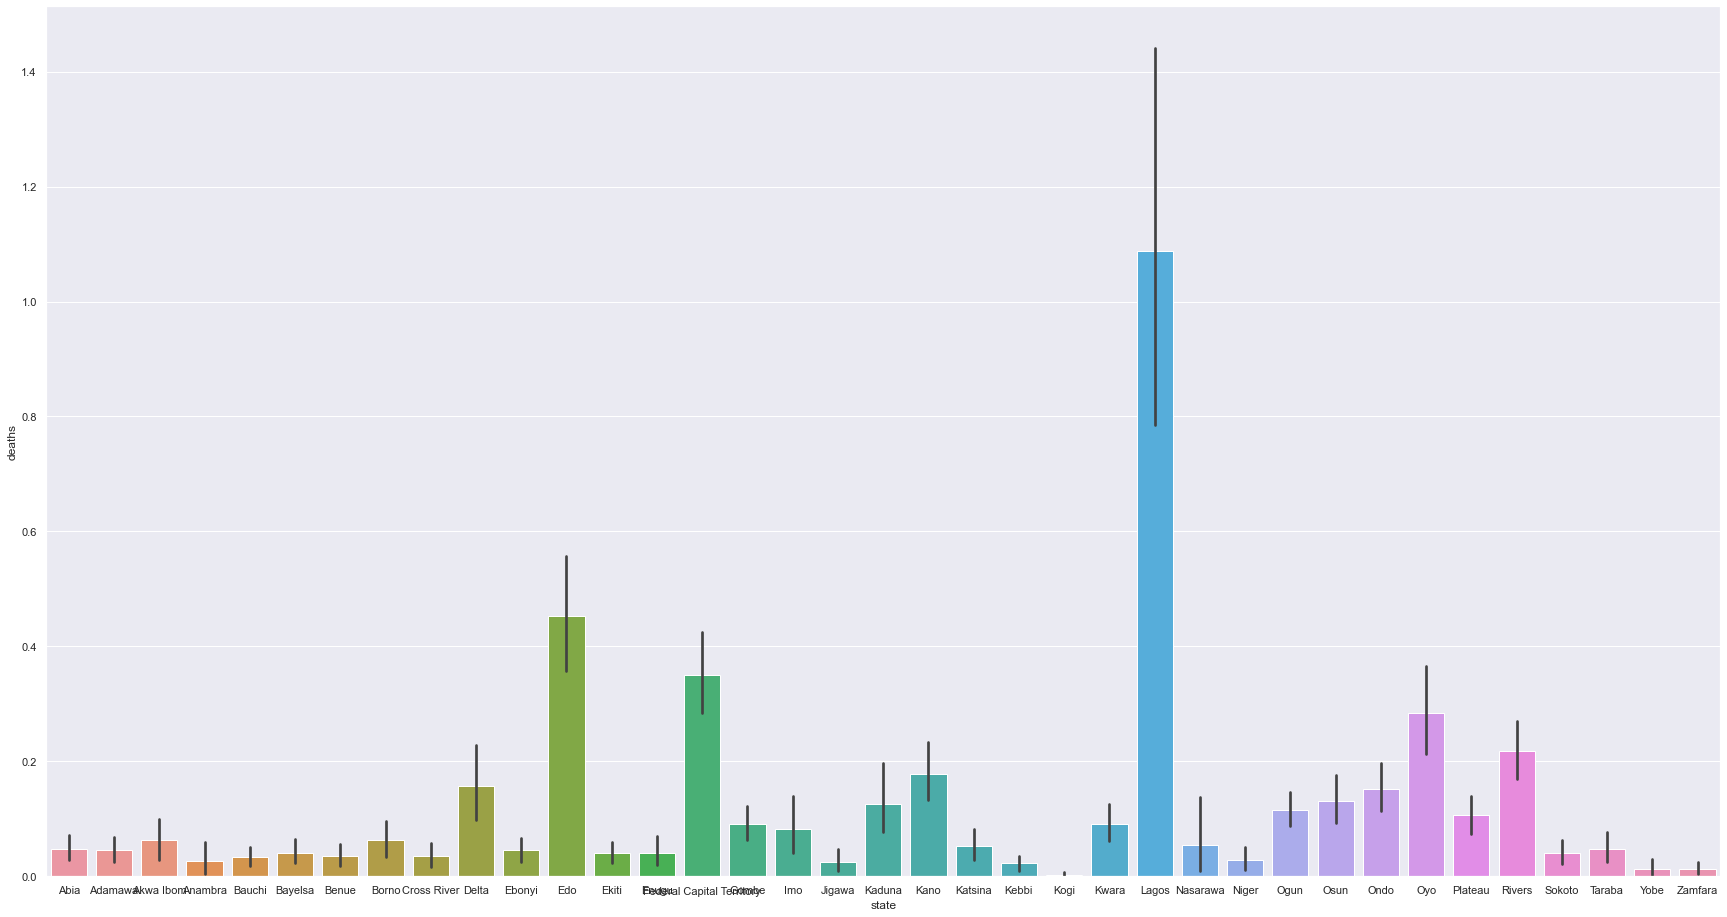

In [ ]:
sns.set(rc={'figure.figsize':(30,16)})
sns.barplot(x='state', y='deaths', data=nga_merged)
#Lagos by far suffered the most fatalities. Not surprising given its massive population.

Grouping the data

In [ ]:
nga_20 = nga_merged2[nga_merged2['year']==2020] # Considering data for the year 2020 only
nga_21 = nga_merged2[nga_merged2['year']==2021] # Considering data for the year 2021 only
#nga_22 = nga_merged2[nga_merged2['year']==2022] # Considering data for the year 2022 only


Grouping by confirmed cases, recovered and deaths by month for each year since the pandemic

For 2020...

In [ ]:
nga_confirmed_20 = nga_20['confirmed'].groupby(nga_20['month']).sum()
nga_confirmed_20


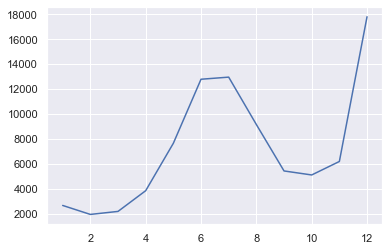

In [233]:
plt.plot(nga_confirmed_20)

In [ ]:
nga_rec_20 = nga_20['recovered'].groupby(nga_20['month']).sum()
nga_rec_20.head()

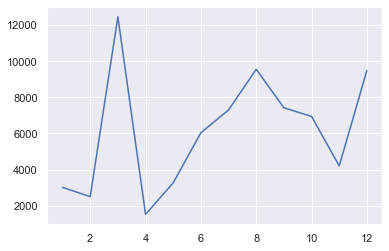

In [234]:
plt.plot(nga_rec_20)

In [ ]:
nga_dea_20 = nga_20['deaths'].groupby(nga_20['month']).sum()
nga_dea_20.head()

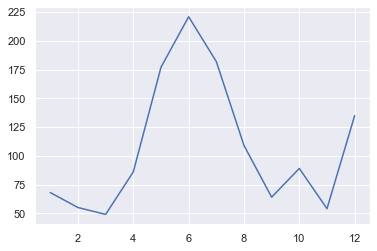

In [235]:
plt.plot(nga_dea_20)

For 2021...

In [ ]:
nga_confirmed_21 = nga_21['confirmed'].groupby(nga_21['month']).sum()
nga_confirmed_21.head()

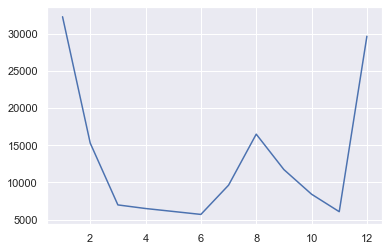

In [236]:
plt.plot(nga_confirmed_21)

In [ ]:
nga_rec_21 = nga_21['recovered'].groupby(nga_21['month']).sum()
nga_rec_21.head()

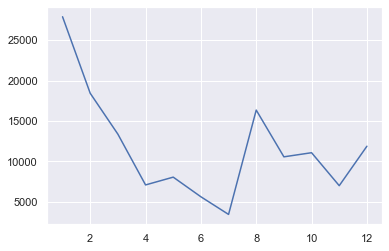

In [237]:
plt.plot(nga_rec_21)

In [ ]:
nga_dea_21 = nga_21['deaths'].groupby(nga_21['month']).sum()
nga_dea_21.head


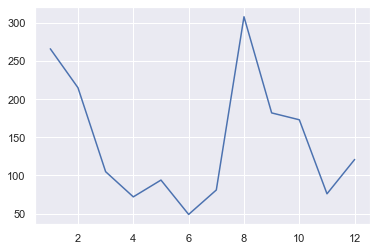

In [238]:
plt.plot(nga_dea_21)

Findings:
2020
> Cases surged in the middle of year, spiking at the end of the year

>Mosts of the deaths occurred during the middle of the year 

Findings:
2021
> The beginning saw high number of cases, sharply falling and surging for a while in the middle of the year before rising sharply again towards the end of the year

>Mosts of the deaths occurred during the in the beginning of the year, paralleling the rise in cases. Deaths lowered throughout the first quarter until August, its peak.